In [1]:
# importing necessary libraries
import numpy as np 
import pandas as pd
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

In [2]:
# mounting the google drive for the Credit Approval dataset from UCI
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
# a class for manual perceptron with various functions
class ml_classifier():

  def __init__(self):
      np.random.seed(1)
      self.weights =  np.random.random((2,1))

  # activation function (sigmoid) for the perceptron
  def activation_perceptron(self, value):       
      activation_value = 1/(1+np.exp(-value.astype(float)))
      activation_value[activation_value < 0.5] = -1
      activation_value[activation_value >= 0.5] = 1
      
      return activation_value   

  def value_predicted(self, value):
      np.set_printoptions(suppress=True) 
      # exponential values are prevented by suppressing

      value = value.astype(float)
      value_output = np.dot(value, self.weights)
  
      # calculating the final output with the activation function called
      output_final = self.activation_perceptron(value_output)

      return output_final

  # defining the training time for the model with epochs, input and output values    
  def training_time(self, epochs, input_train, output_train): 
    learning_rate = [0.1, 0.01, 0.001]
    for i in range(epochs):
      l = (int) (i / 17)
      output_predicted = self.value_predicted(input_train)
      train_error = output_train - output_predicted
      # train error is basically the difference between actual output and the predicted output 
      weight_adjustment = learning_rate[l] * np.dot(input_train.T, train_error)

      # providing weights with learning rate

      self.weights += weight_adjustment 

  # defining the function to predict the accuracy from given values   
  def accuracy_predicted(self, label_original, value_predicted):

      total = 0
      for i in range(len(label_original)):
      
        # looping it for entire count of the labels
        if label_original[i] == value_predicted[i]:
      
          total += 1
      
      # calculating the the accuracy
      value_accuracy = total / float(len(label_original)) * 100.0       
      
      return value_accuracy
  
  


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:10: RuntimeWarning: overflow encountered in exp
  # Remove the CWD from sys.path while we load stuff.


Training Accuracy for the Half moon problem : 100.0 %
Training Error Rate for Half Moon problem : 0.0 %
Testing Accuracy for the Half moon problem : 99.9 %
Testing Error Rate for Half Moon problem: 0.4 %
Training Accuracy for Credit Approval (UCI dataset) : 46.058091286307054 %
Testing Accuracy for Credit Approval (UCI dataset) : 40.86538461538461 %


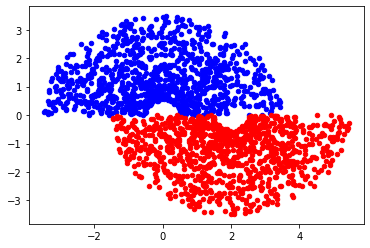

In [5]:
if __name__ == "__main__":

    # assigning the half moon variables like radius, distance and width to train it
    radius = 2
    distance = 0
    sample_total = 1000
    width = 3
    pi = 3.14
  
    # check if radius is larger than half the width
    if radius < width/2:
       print('The radius should be equal to or larger than half the width')

    # check if samples are even in number    
    if sample_total % 2 != 0 :
       print('Make sure the number of samples is even')
            
    sample_value= np.random.rand(2,(int)(sample_total/2))

    # final radius count is calculated
    radius_final = (radius-width/2) + width*sample_value[0,:]
    radius_final = np.reshape(radius_final, (1,np.product(radius_final.shape))) 
    theta = pi*sample_value[1,:]
    theta=np.reshape(theta, (1,np.product(theta.shape))) 
        
    # defining variables for different coordinates
    x1 = radius_final*np.cos(theta)
    x1 = np.reshape(x1, (1,np.product(x1.shape))) 
    y1 = radius_final*np.sin(theta)
    y1 = np.reshape(y1, (1,np.product(y1.shape))) 

    # label for first class 
    label1 = 1*np.ones([1,x1.size])
        
    x2 = radius_final*np.cos(-theta)+radius
    x2 = np.reshape(x2, (1,np.product(x2.shape))) 
    y2 = radius_final*np.sin(-theta)-distance
    y2 = np.reshape(y2, (1,np.product(y2.shape))) 

    # label for second class 
    label2 = -1*np.ones([1,x1.size])

    # using vstack and hstack to stack the arrays vertically and horizontally respectively            
    data1 = np.vstack((np.hstack((x1,x2)),np.hstack((y1,y2))))
    data2 = np.hstack((label1,label2))

    # once the arrays are stacked, it is concatenated
    data_final = np.concatenate((data1,data2),axis=0)
    rows_total = data_final.shape[0]
    columns_total = data_final.shape[1]

    # column values are shuffled
    sequence_shuffle = np.random.permutation(columns_total)
        
        
    randomized_data = np. random.rand(3,1000)
    for i in range(columns_total):
       randomized_data[:,i] = data_final[:,sequence_shuffle[i]];
    
    data_input_train = np.stack([randomized_data[0], randomized_data[1]], axis=1)
   
    # initialising the halfmoon_lms function defined earlier 
    perceptron_halfmoon = ml_classifier()
    
    data_labels  = randomized_data[2].reshape(1000,1)
    perceptron_halfmoon.training_time(50,data_input_train,data_labels)
    
    # Training Calculation
    predicted_output_train = perceptron_halfmoon.value_predicted(data_input_train)
    actual_output_train = randomized_data[2].reshape(1000,1)

    # calculating the error rate and accuracy for the model
    error_rate_train = np.square(np.subtract(actual_output_train,predicted_output_train)).mean()
    accuracy_train = accuracy_score(predicted_output_train,actual_output_train)

    # printing the accuracy and error rate for the half moon problem 
    print("Training Accuracy for the Half moon problem :",accuracy_train*100, "%")
    print("Training Error Rate for Half Moon problem :", error_rate_train*100 ,"%")


    # performing the similar steps for testing
    radius = 2
    distance = 0
    sample_total = 2000
    width = 3
    pi = 3.14

    # check if radius is larger than half the width
    if radius < width/2:
       print('The radius_final should be at least larger than half the width')
        
    # check if samples are even in number    
    if sample_total % 2 != 0 :
       print('Please make sure the number of samples is even')
            
    sample_value= np.random.rand(2,(int)(sample_total/2))
    radius_final = (radius-width/2) + width*sample_value[0,:]
    radius_final=np.reshape(radius_final, (1,np.product(radius_final.shape))) 
    theta = pi*sample_value[1,:]
    theta=np.reshape(theta, (1,np.product(theta.shape))) 
        
    # defining variables for different coordinates
    x1 = radius_final*np.cos(theta)
    x1 = np.reshape(x1, (1,np.product(x1.shape))) 
    y1 = radius_final*np.sin(theta)
    y1 = np.reshape(y1, (1,np.product(y1.shape))) 

    # label for first test class
    label1 = 1*np.ones([1,x1.size])
        
    x2 = radius_final*np.cos(-theta)+radius
    x2 = np.reshape(x2, (1,np.product(x2.shape))) 
    y2 = radius_final*np.sin(-theta)-distance
    y2 = np.reshape(y2, (1,np.product(y2.shape))) 

    # label for second test class
    label2 = -1*np.ones([1,x1.size])
        
    # using vstack and hstack to stack the arrays vertically and horizontally respectively            
    data1 = np.vstack(( np.hstack((x1,x2)),np.hstack((y1,y2)) ))
    data2 = np.hstack( (label1,label2) )

    # once the arrays are stacked, it is concatenated
    data_final = np.concatenate( (data1,data2 ),axis=0 )
    rows_total = data_final.shape[0]
    columns_total = data_final.shape[1]
    sequence_shuffle = np.random.permutation(columns_total)
        
    # randomized data for all columns
    randomized_data = np.random.rand(3,2000)
    for i in range(columns_total):
       randomized_data[:,i] = data_final[:,sequence_shuffle[i] ];
    
    # Testing calculation
    data_input_test = np.stack([randomized_data[0], randomized_data[1]], axis=1)
    predicted_output_test = perceptron_halfmoon.value_predicted(data_input_test)
    actual_output_test = randomized_data[2].reshape(2000,1)

    # calculating the error rate and accuracy for the model
    error_rate_test = np.square(np.subtract(actual_output_test,predicted_output_test)).mean()
    accuracy = accuracy_score(predicted_output_test,actual_output_test)

    # printing the accuracy and error rate for the half moon problem 
    print("Testing Accuracy for the Half moon problem :",accuracy*100, "%")
    print("Testing Error Rate for Half Moon problem:", error_rate_test*100 ,"%")

    # initialising the values for positive and negative coordinates to plot the half moon 
    data_pos = data_final[:,0:1000]
    data_neg = data_final[:,1000:2000]

    # creating the half moon plot using the samples randomized
    plt.figure()
    plt.scatter(data_pos[0,:],data_pos[1,:],c="b",s=20)
    plt.scatter(data_neg[0,:],data_neg[1,:],c="r",s=20)

# Part 2 of the Assignment - Dataset is the Credit approval from UCI

    # reading the credit approval dataset from the UCI repository "https://archive.ics.uci.edu/ml/datasets/Credit+Approval"
    data = pd.read_csv("/content/drive/My Drive/crx.csv")

    # using the columns 'a2' and 'a10' as the inputs because they contain numerical values  
    data_input = pd.DataFrame(data, columns = ['a2', 'a10']).to_numpy()

    # label output is initialised with 'a15' which is to be classified as it is binary value with either '+' or '-'
    label_output = pd.DataFrame(data, columns = ['a15']).to_numpy()

    # the label output is assigned -1 if the value in a15 is '-' and 1 if it is '+'
    label_output[label_output == '-'] = 0
    label_output[label_output == '+'] = 1
    
    # Splitting the dataset into test and train with 70:30 train:test ratio
    X_train, X_test, y_train, y_test = train_test_split(data_input, label_output, train_size=0.7, random_state = 1)

    # calling the class defined earlier for the perceptron
    perceptron_creditApproval = ml_classifier()

    # calculating and printing the training accuracy
    perceptron_output_train = perceptron_creditApproval.value_predicted(X_train)
    accuracy_train = perceptron_creditApproval.accuracy_predicted(y_train,perceptron_output_train)

    print("Training Accuracy for Credit Approval (UCI dataset) :",accuracy_train, "%")

    # calculating and printing test accuracy
    perceptron_output_test = perceptron_creditApproval.value_predicted(X_test)
    accuracy_test = perceptron_creditApproval.accuracy_predicted(y_test, perceptron_output_test)

    print("Testing Accuracy for Credit Approval (UCI dataset) :",accuracy_test, "%")
